# Assignment 4 [Customer Segmentation Analysis]

## Load the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [42]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [43]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [44]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [45]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Perform Below Visualizations

### Univariate Analysis

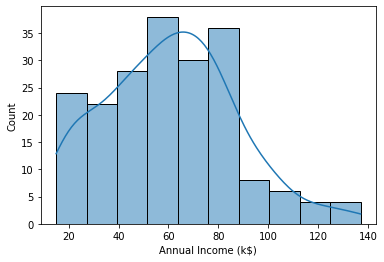

In [46]:
sns.histplot(df["Annual Income (k$)"], kde=True)

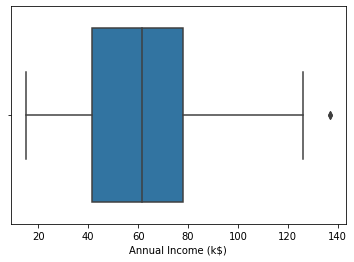

In [47]:
sns.boxplot(df["Annual Income (k$)"])

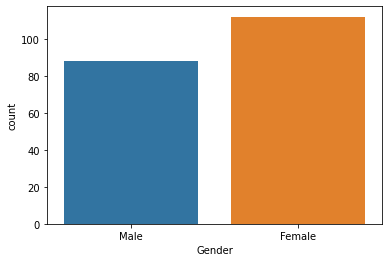

In [48]:
sns.countplot(df["Gender"])

### Bivariate Analysis

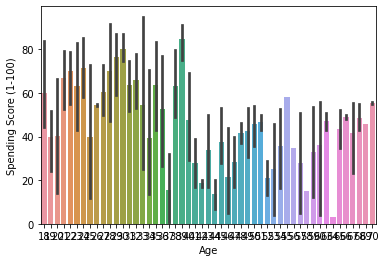

In [49]:
sns.barplot(x="Age", y="Spending Score (1-100)", data=df)

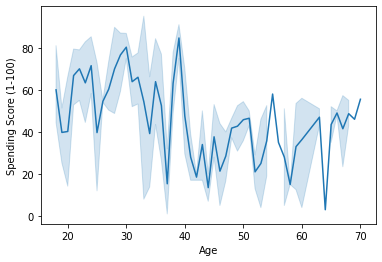

In [50]:
sns.lineplot(x="Age", y="Spending Score (1-100)", data=df)

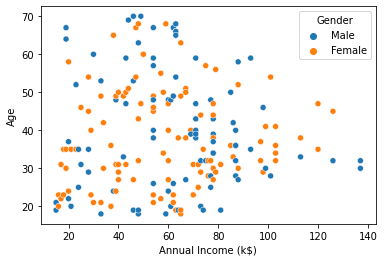

In [51]:
sns.scatterplot(x='Annual Income (k$)',y='Age',hue='Gender',data=df)

### Multi-Variate Analysis

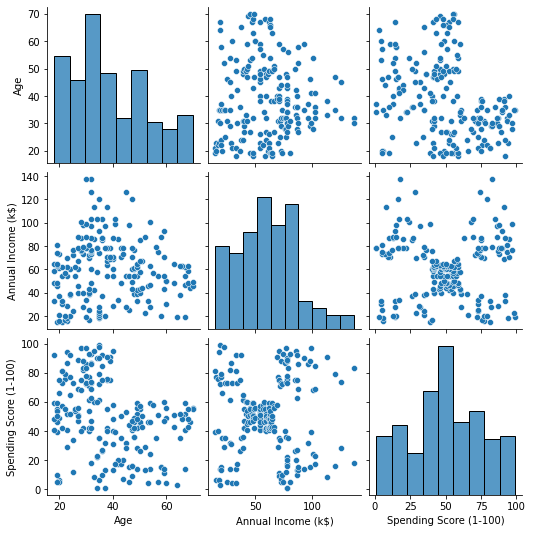

In [52]:
sns.pairplot(data=df[["Gender", "Age","Annual Income (k$)","Spending Score (1-100)"]])

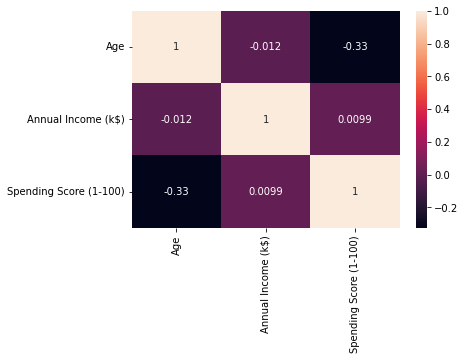

In [53]:
sns.heatmap(df.corr(),annot=True)

## Perform descriptive statistics on the dataset.

In [54]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Check for Missing values and deal with them

In [55]:
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Find the outliers and replace the outliers

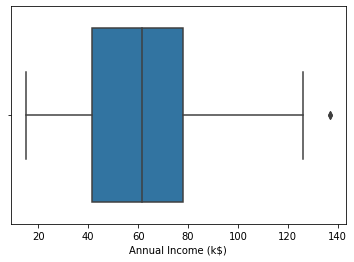

In [56]:
sns.boxplot(x = df['Annual Income (k$)'], orient='h')

In [57]:
q = df['Annual Income (k$)'].quantile(q=[0.75,0.25])
iqr=q.iloc[0]-q.iloc[1]
lower = q.iloc[1] - 1.5*iqr
upper = q.iloc[0] + 1.5*iqr

In [58]:
df['Annual Income (k$)'] = np.where(df['Annual Income (k$)']>upper,upper,np.where(df['Annual Income (k$)']<lower,lower,df['Annual Income (k$)']))

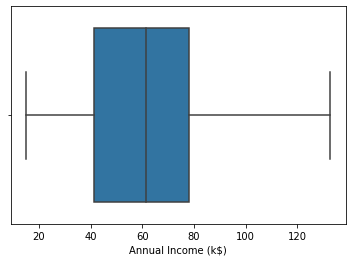

In [59]:
sns.boxplot(x = df['Annual Income (k$)'])

## Check for Categorical columns and perform encoding

In [60]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,accuracy_score,f1_score,hamming_loss,confusion_matrix,roc_auc_score

import warnings # to avoid warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [61]:
encoder = LabelEncoder()

In [62]:
df['Gender'] = encoder.fit_transform(df['Gender'])

In [63]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


## Scaling the data

In [64]:
scaler = MinMaxScaler()

In [65]:
scaled_data = scaler.fit_transform(df)
scaled_data[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

## Perform any of the clustering algorithms

In [66]:
from sklearn.cluster import KMeans
km = KMeans(algorithm='elkan',n_init=100, max_iter=3000)
res = km.fit_predict(scaled_data)
res

array([6, 6, 4, 4, 4, 4, 7, 4, 3, 4, 3, 4, 7, 4, 5, 6, 4, 6, 3, 4, 6, 6,
       7, 6, 7, 6, 7, 6, 7, 4, 3, 4, 3, 6, 7, 4, 7, 4, 7, 4, 7, 6, 3, 4,
       7, 4, 7, 4, 4, 4, 7, 6, 4, 3, 7, 3, 7, 3, 4, 3, 3, 6, 7, 7, 3, 6,
       7, 7, 6, 4, 3, 7, 7, 7, 3, 6, 7, 6, 4, 7, 3, 6, 3, 7, 4, 3, 7, 4,
       4, 7, 7, 6, 3, 7, 4, 6, 7, 4, 3, 6, 4, 7, 3, 6, 3, 4, 7, 3, 3, 3,
       3, 4, 7, 6, 4, 4, 7, 7, 7, 7, 6, 7, 2, 1, 4, 2, 5, 1, 3, 1, 5, 1,
       4, 2, 5, 2, 0, 1, 5, 2, 0, 1, 4, 2, 5, 1, 3, 2, 0, 1, 5, 1, 0, 2,
       0, 2, 5, 2, 5, 2, 7, 2, 5, 2, 5, 2, 5, 2, 0, 1, 5, 1, 5, 1, 0, 2,
       3, 1, 3, 1, 0, 2, 5, 2, 0, 1, 0, 1, 0, 2, 0, 2, 5, 2, 0, 2, 0, 1,
       5, 1], dtype=int32)

In [67]:
df1 = pd.DataFrame(scaled_data, columns = df.columns)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


## Add the cluster data with the primary dataset

In [68]:
df1['Cluster']  = pd.Series(res)
df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1.0,0.019231,0.000000,0.387755,6
1,1.0,0.057692,0.000000,0.816327,6
2,0.0,0.038462,0.008493,0.051020,4
3,0.0,0.096154,0.008493,0.775510,4
4,0.0,0.250000,0.016985,0.397959,4


In [69]:
df1['Cluster'].unique()

array([6, 4, 7, 3, 5, 2, 1, 0], dtype=int32)

In [70]:
df1['Cluster'].value_counts()

7    39
4    37
3    29
6    24
2    22
1    18
5    17
0    14
Name: Cluster, dtype: int64

## Split the data into dependent and independent variables.

In [71]:
X = df1.iloc[:,0:4]
X.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [72]:
y = df1.iloc[:,4:]
y.head()

,Cluster
0,6
1,6
2,4
3,4
4,4


## Split the data into training and testing

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [74]:
y_train.head()

,Cluster
116,7
67,7
78,4
42,3
17,6


## Build the model

In [75]:
classifier_model = SVC(decision_function_shape='ovo')

## Train the model

In [76]:
classifier_model.fit(X_train,y_train.values.flatten())

SVC(decision_function_shape='ovo')

## Test the model

In [77]:
pred_y = classifier_model.predict(X_test)
pred_y[0:5]

array([4, 7, 7, 3, 0], dtype=int32)

## Measure the performance using Evaluation Metrics

In [78]:
print('Classification Report: ')
print(classification_report(y_test, pred_y))

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         5
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00        15
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00        11

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



Confusion Matrix: 


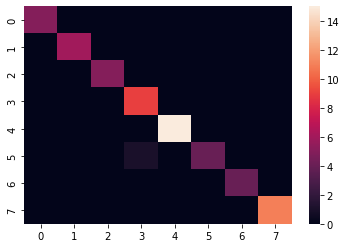

In [79]:
print('Confusion Matrix: ')
sns.heatmap(confusion_matrix(y_test,pred_y))

In [80]:
print('F1 Score: ',f1_score(y_test,pred_y, average='weighted'))

F1 Score:  0.9828460038986354


In [81]:
print('Hamming Loss: ',hamming_loss(y_test,pred_y))

Hamming Loss:  0.016666666666666666


In [82]:
print('Accuracy: ',accuracy_score(y_test,pred_y))

Accuracy:  0.9833333333333333
